# Face Detection with Haar Cascades

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [2]:
erkek = cv2.imread('../DATA/erkek.jpg',0)
kadin = cv2.imread('../DATA/kadin.jpg',0)
toplu_foto = cv2.imread('../DATA/toplu_foto.jpg',0)

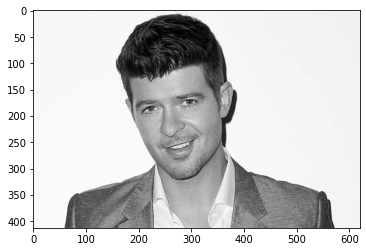

In [3]:
plt.imshow(erkek,cmap='gray')

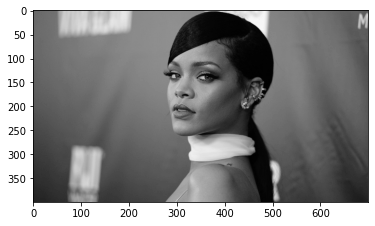

In [5]:
plt.imshow(kadin,cmap='gray')

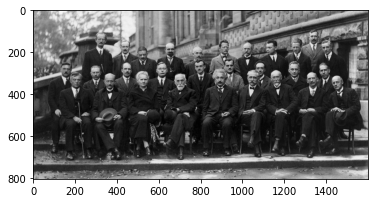

In [6]:
plt.imshow(toplu_foto,cmap='gray')

## Cascade Files

## Face Detection

In [7]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [9]:
result = detect_face(erkek)

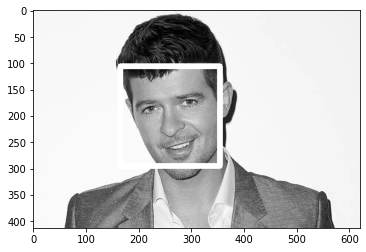

In [10]:
plt.imshow(result,cmap='gray')

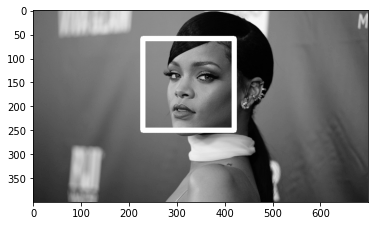

In [11]:
result = detect_face(kadin)
plt.imshow(result,cmap='gray')

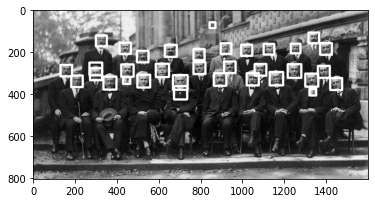

In [12]:
result = detect_face(toplu_foto)
plt.imshow(result,cmap='gray')

In [13]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

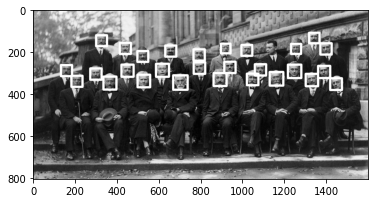

In [14]:
# Doesn't detect the side face.
result = adj_detect_face(toplu_foto)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [15]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [16]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

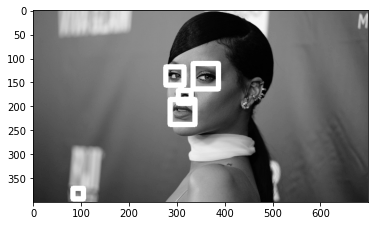

In [17]:
result = detect_eyes(kadin)
plt.imshow(result,cmap='gray')

In [18]:
eyes = eye_cascade.detectMultiScale(erkek) 

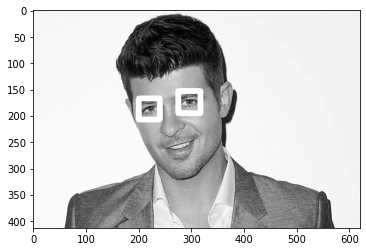

In [19]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(erkek)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Conjunction with Video

In [ ]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()